In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

In [47]:
# Đọc file csv và gắng index với giá Close
df = pd.read_csv('D:/PTDLKD/ProjectData/dataset/ERIC.csv')
df1 = df.reset_index()['Close']
df1.describe()

count    3375.000000
mean        9.728969
std         2.352608
min         4.850000
25%         7.910000
50%         9.750000
75%        11.760000
max        15.380000
Name: Close, dtype: float64

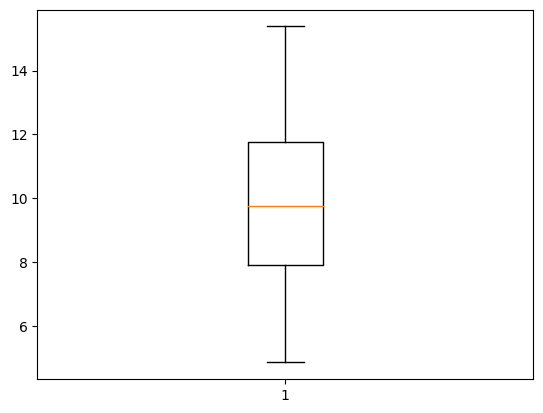

In [48]:
# Tạo plot
plt.boxplot(df1)
plt.show()

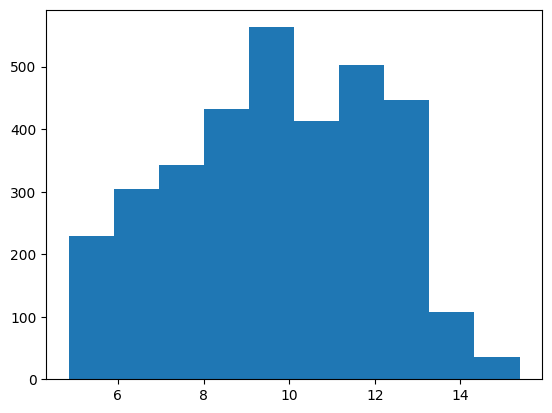

In [49]:
# Tạo Histogram
plt.hist(df1)
plt.show()

In [50]:
# Scaler data
scaler = MinMaxScaler(feature_range=(0, 1))
df1 = scaler.fit_transform(np.array(df1).reshape(-1, 1))


In [51]:
# Chia train/test
train_size = int(0.7 * len(df1))
test_size = int(0.2 * len(df1))
val_size = len(df1) - train_size - test_size

train_data = df1[:train_size]
test_data = df1[train_size:train_size+test_size]
val_data = df1[train_size+test_size:]

In [52]:
# Hàm Create Dataset
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset)-time_step-1):
        a = dataset[i:(i+time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

In [53]:
# Reshape into X=t,t+1,t+2..t+99 and Y=t+100
time_step = 277
X_train, y_train = create_dataset(train_data, time_step)
X_val, yval = create_dataset(val_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)


In [54]:
# Fit mô hình GradientBoostingRegressor
model = GradientBoostingRegressor()
model.fit(X_train, y_train)

GradientBoostingRegressor()

In [55]:
# Dự báo dữ liệu
train_predict = model.predict(X_train)
y_pred = model.predict(X_test)
y_pred_val = model.predict(X_val)

In [56]:
# 11. Chuẩn hóa dữ liệu y_pred, y_pred_val

train_predict = scaler.inverse_transform(train_predict.reshape(-1, 1))
y_pred = scaler.inverse_transform(y_pred.reshape(-1, 1))
y_pred_val = scaler.inverse_transform(y_pred_val.reshape(-1, 1))
y_test = scaler.inverse_transform(ytest.reshape(-1, 1))
y_val = scaler.inverse_transform(yval.reshape(-1, 1))

In [57]:
ytest = scaler.inverse_transform(ytest.reshape(-1,1) )
yval = scaler.inverse_transform(yval.reshape(-1,1) )

In [58]:
# 12. Đánh giá độ chính xác thuật toán
valid_rmse = np.sqrt(np.mean((y_pred_val - yval)**2))
test_rmse = np.sqrt(np.mean((y_pred - ytest)**2))
valid_mae = np.mean(np.abs(y_pred_val - yval))
test_mae = np.mean(np.abs(y_pred - ytest))
valid_mape = np.mean(np.abs((y_pred_val - yval) / yval)) * 100
test_mape = np.mean(np.abs((y_pred - ytest) / ytest)) * 100
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

Validation RMSE: 0.12742292430647292
Testing RMSE: 0.2502191936195096
Validation MAE: 0.08983957348410043
Testing MAE: 0.16897418047591692
Validation MAPE: 1.6731712640186032
Testing MAPE: 1.4309439125875785


In [59]:
# Dự báo 30 ngày tiếp theo
x_input=val_data[60:].reshape(1,-1)
x_input.shape

temp_input=list(x_input)
temp_input=temp_input[0].tolist()

from numpy import array

lst_output=[]
n_steps=277
i=0
while(i<30):
    
    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps))
        #print(x_input)
        yhat = model.predict(x_input)
        print("{} day output {}".format(i,yhat))
    
        temp_input.append(yhat[0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


0 day input [0.34377968 0.32193732 0.31623932 0.30769231 0.29534663 0.30579297
 0.31813865 0.33903134 0.29724596 0.27160494 0.25261159 0.2668566
 0.24786325 0.24786325 0.26590693 0.28395062 0.30389364 0.27540361
 0.27730294 0.27730294 0.29724596 0.29724596 0.29154796 0.30389364
 0.32288699 0.30674264 0.3048433  0.331434   0.31908832 0.32003799
 0.328585   0.31813865 0.2991453  0.25451092 0.23931624 0.23646724
 0.25641026 0.23266857 0.24501425 0.26590693 0.27065527 0.26115859
 0.28300095 0.29439696 0.27825261 0.26495726 0.24216524 0.24501425
 0.23931624 0.24406458 0.26020893 0.25735992 0.2317189  0.23646724
 0.25071225 0.18518519 0.21082621 0.21652422 0.22032289 0.23361823
 0.24786325 0.23551757 0.2345679  0.22697056 0.24406458 0.24216524
 0.25546059 0.25830959 0.24976258 0.25546059 0.26780627 0.26495726
 0.25641026 0.24976258 0.27825261 0.27255461 0.26590693 0.26020893
 0.26495726 0.2640076  0.2668566  0.26020893 0.23076923 0.23266857
 0.23266857 0.24501425 0.22317189 0.21747388 0.2279

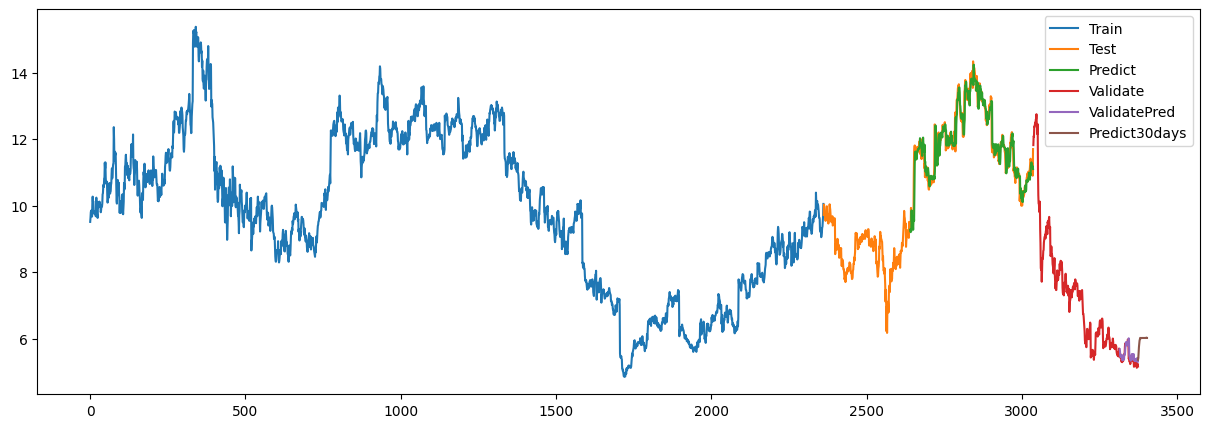

In [60]:
# Vẽ hình
train_data_index = pd.RangeIndex(start=0, stop=train_size, step=1)
plt.subplots(figsize=(15, 5))
plt.plot(scaler.inverse_transform(train_data))
test_data_index = pd.RangeIndex(start=train_size, stop=train_size+test_size, step=1)
plt.plot(test_data_index,scaler.inverse_transform(test_data))
test_data_index = pd.RangeIndex(start=train_size+278, stop=train_size+test_size, step=1)
plt.plot(test_data_index[:len(y_pred)], y_pred)
val_data_index = pd.RangeIndex(start=train_size+test_size, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index,scaler.inverse_transform(val_data))
val_data_index = pd.RangeIndex(start=train_size+test_size+278, stop=train_size+test_size+val_size, step=1)
plt.plot(val_data_index[:len(y_pred)],y_pred_val)
prediect_data_index = pd.RangeIndex(start=len(df1)-1, stop=len(df1)+29, step=1)
plt.plot(prediect_data_index[:len(y_pred)], scaler.inverse_transform(np.reshape(lst_output, (-1, 1))))
plt.legend(['Train', 'Test', 'Predict', 'Validate', 'ValidatePred', 'Predict30days'])
plt.show()

In [61]:
lst_output_2d = np.array(lst_output).reshape(-1, 1)
scaler.inverse_transform(lst_output_2d)

array([[5.36181633],
       [5.41969916],
       [5.57877431],
       [5.74197823],
       [5.84152513],
       [5.93515856],
       [5.97391175],
       [6.02073777],
       [6.01628699],
       [6.00808185],
       [6.00808185],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.01733668],
       [6.02911952],
       [6.01733668],
       [6.01733668]])